In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

# Caminho para o arquivo local
caminho_arquivo = 'data/adult/adult.data'

# Nomes das colunas conforme documentação da UCI
colunas = [
    "age", "workclass", "fnlwgt", "education", "education-num",
    "marital-status", "occupation", "relationship", "race", "sex",
    "capital-gain", "capital-loss", "hours-per-week", "native-country", "income"
]

# Leitura do arquivo
df = pd.read_csv(caminho_arquivo, names=colunas, na_values=" ?", skipinitialspace=True)

# Visualizar primeiras linhas
print(df.head())


   age         workclass  fnlwgt  education  education-num  \
0   39         State-gov   77516  Bachelors             13   
1   50  Self-emp-not-inc   83311  Bachelors             13   
2   38           Private  215646    HS-grad              9   
3   53           Private  234721       11th              7   
4   28           Private  338409  Bachelors             13   

       marital-status         occupation   relationship   race     sex  \
0       Never-married       Adm-clerical  Not-in-family  White    Male   
1  Married-civ-spouse    Exec-managerial        Husband  White    Male   
2            Divorced  Handlers-cleaners  Not-in-family  White    Male   
3  Married-civ-spouse  Handlers-cleaners        Husband  Black    Male   
4  Married-civ-spouse     Prof-specialty           Wife  Black  Female   

   capital-gain  capital-loss  hours-per-week native-country income  
0          2174             0              40  United-States  <=50K  
1             0             0             

In [10]:
# Verificar valores nulos
print(df.isnull().sum())

# Número total de linhas
total_linhas = len(df)

# Número de linhas com ao menos um valor nulo
linhas_com_nulos = df.isnull().any(axis=1).sum()

# Porcentagem
porcentagem_nulos = (linhas_com_nulos / total_linhas) * 100

print(f"{porcentagem_nulos:.2f}% das linhas possuem ao menos um valor nulo.")

# Remover linhas com valores faltantes
df.dropna(inplace=True)

# Remover colunas pouco informativas
df.drop(['fnlwgt'], axis=1, inplace=True)

# Transformar variáveis categóricas
categorical_cols = df.select_dtypes(include=['object']).columns
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Normalizar os dados
scaler = StandardScaler()
X = df.drop('income', axis=1)
y = df['income']

X_scaled = scaler.fit_transform(X)

age               0
workclass         0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64
0.00% das linhas possuem ao menos um valor nulo.


KeyError: "['fnlwgt'] not found in axis"

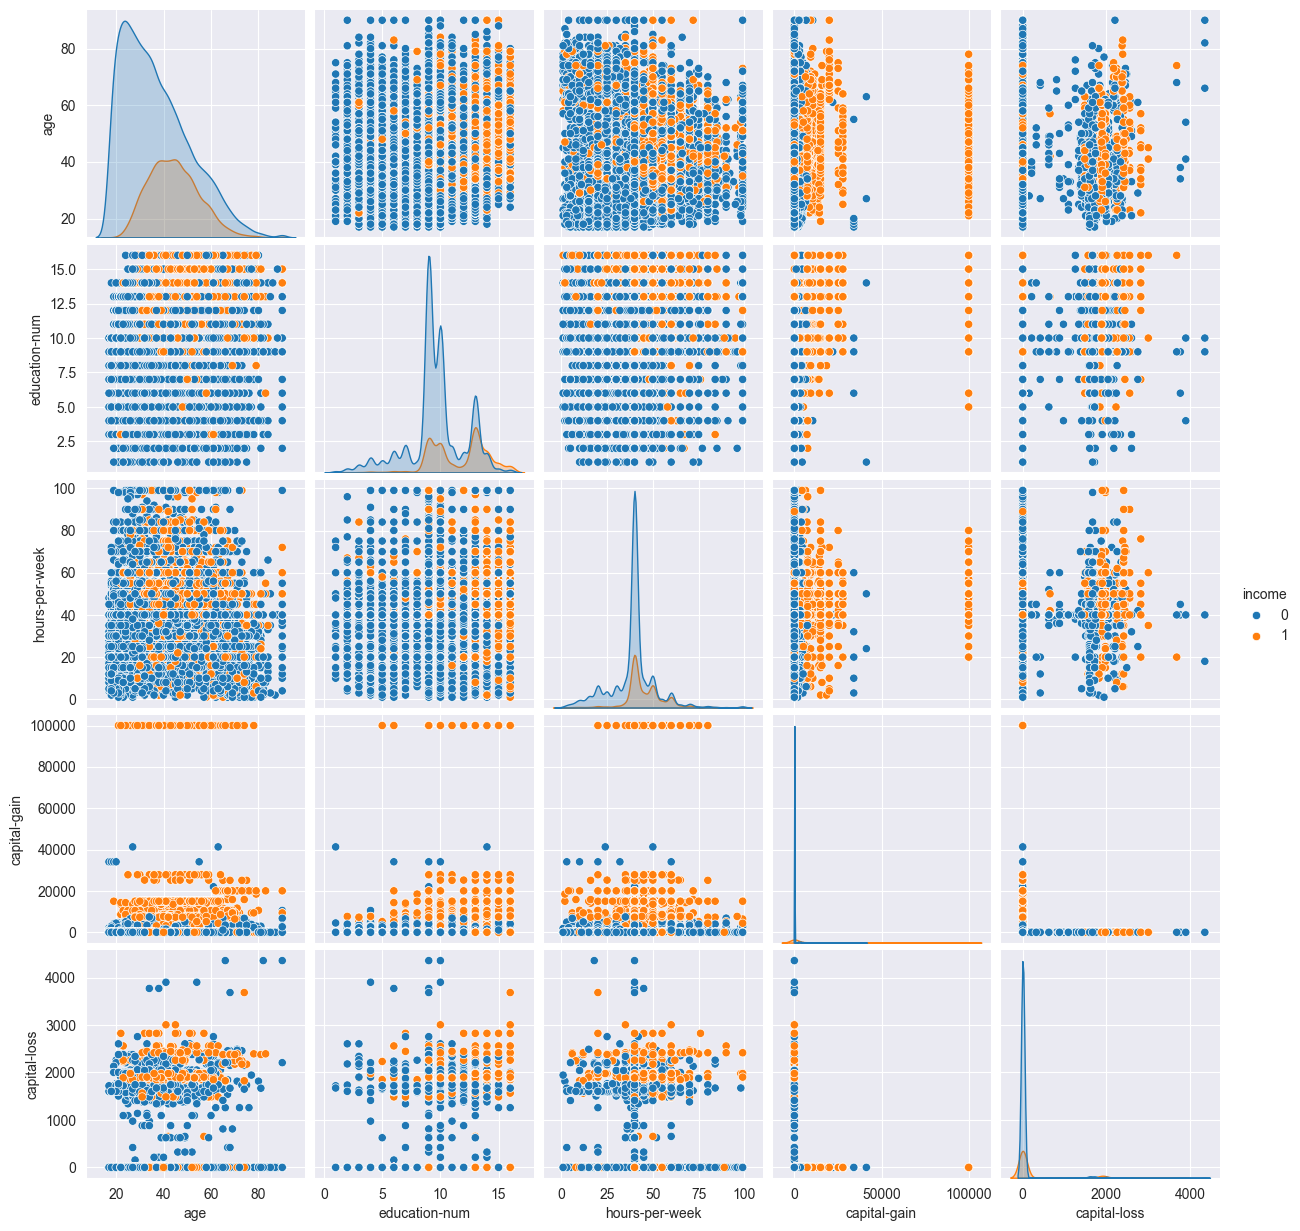

In [9]:
# Selecionar apenas algumas colunas para visualização
subset = df[['age', 'education-num', 'hours-per-week', 'capital-gain', 'capital-loss', 'income']]
sns.pairplot(subset, hue='income', diag_kind='kde')
plt.show()

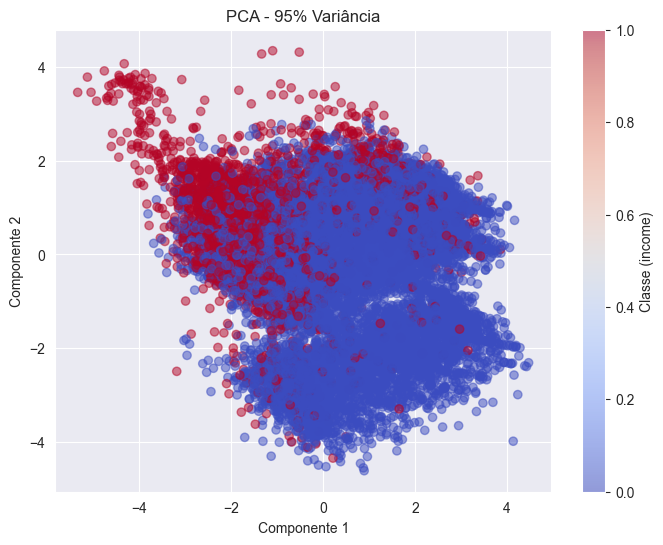

In [13]:
from sklearn.decomposition import PCA

# Inicializar o PCA para manter 95% da variância
pca = PCA(n_components=0.95)

# Ajustar e transformar os dados
X_pca = pca.fit_transform(X_scaled)

# Visualização com PCA
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='coolwarm', alpha=0.5)
plt.title("PCA - 95% Variância")
plt.xlabel("Componente 1")
plt.ylabel("Componente 2")
plt.colorbar(label="Classe (income)")
plt.show()